In [1227]:
import numpy as np   
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [1228]:
df = pd.read_excel('Election_Data.xlsx','Election_Dataset_Two Classes')

In [1229]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


In [1230]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [1231]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [1232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [1233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [1234]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1235]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [1236]:
df.duplicated().sum()

0

In [1237]:
df.skew()

Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

# 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [1238]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [1239]:
data_num = df.drop(['vote','gender','Unnamed: 0'],axis=1)
data_num.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


In [1240]:
data_cat = df[['vote','gender']]
data_cat.head()

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male


In [1241]:
#Univarite Analysis

In [1242]:
#Numeric values

age
0.14


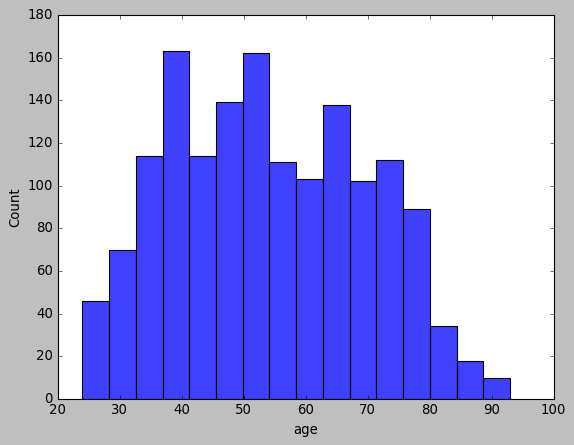

economic.cond.national
-0.24


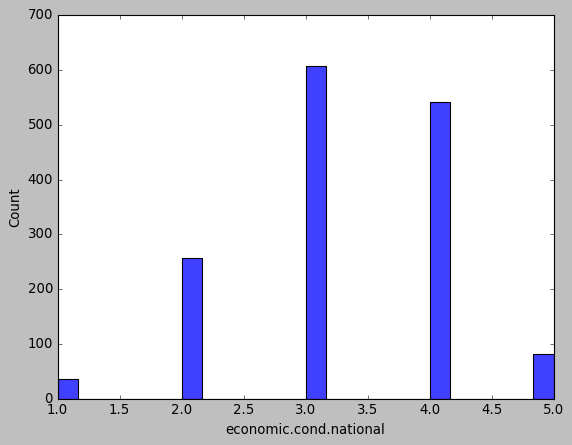

economic.cond.household
-0.15


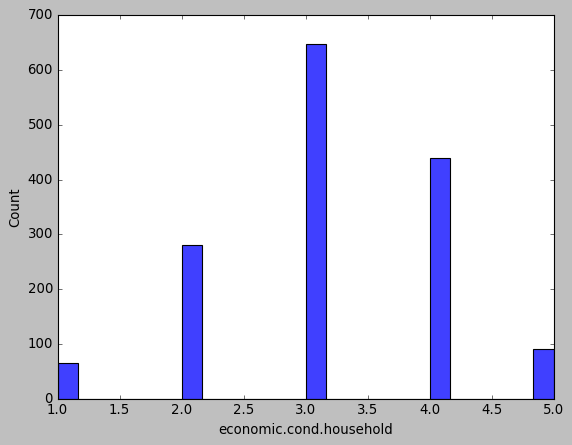

Blair
-0.54


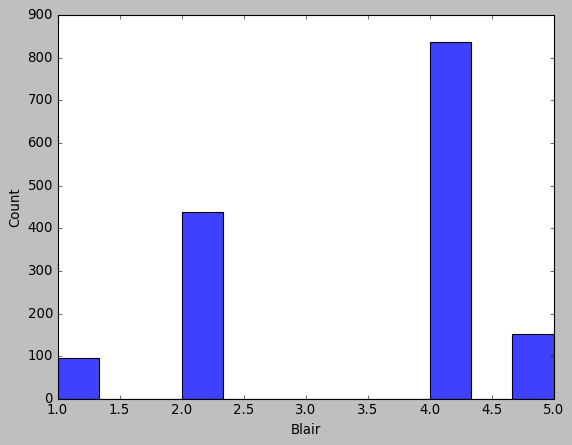

Hague
0.15


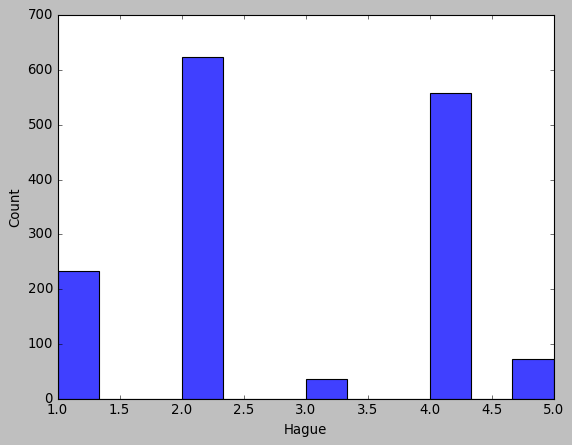

Europe
-0.14


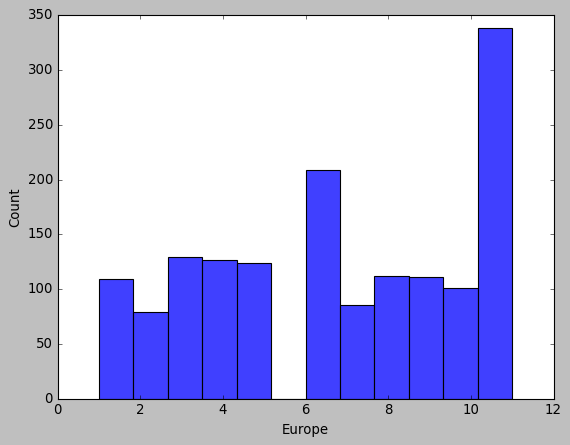

political.knowledge
-0.43


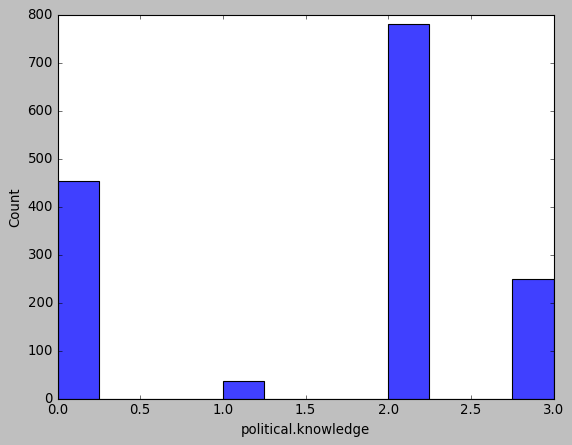

In [1243]:
for col in data_num.columns[:]:
    print(col)
    print(round(data_num[col].skew(),2))
    sns.histplot(x=data_num[col])
    plt.show()

In [1244]:
#Categorical variable

vote


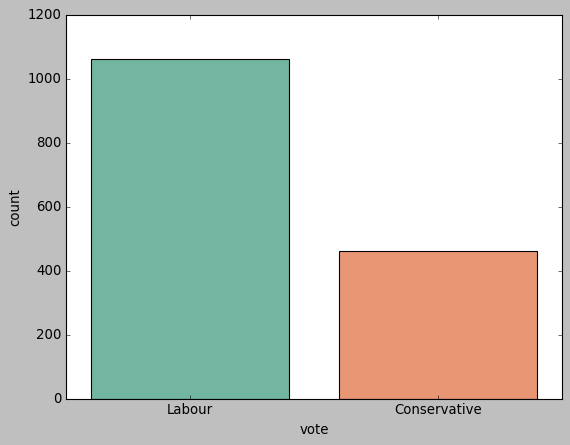

gender


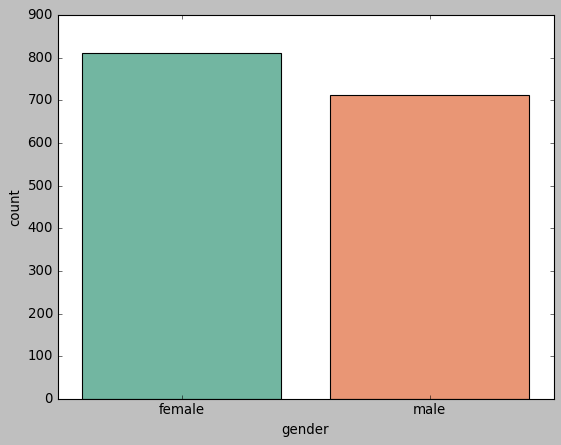

In [1245]:
for col in data_cat.columns[:]:
    print(col)
    sns.countplot(x=data_cat[col],palette ='Set2')
    plt.show()

In [1246]:
#Bivariate

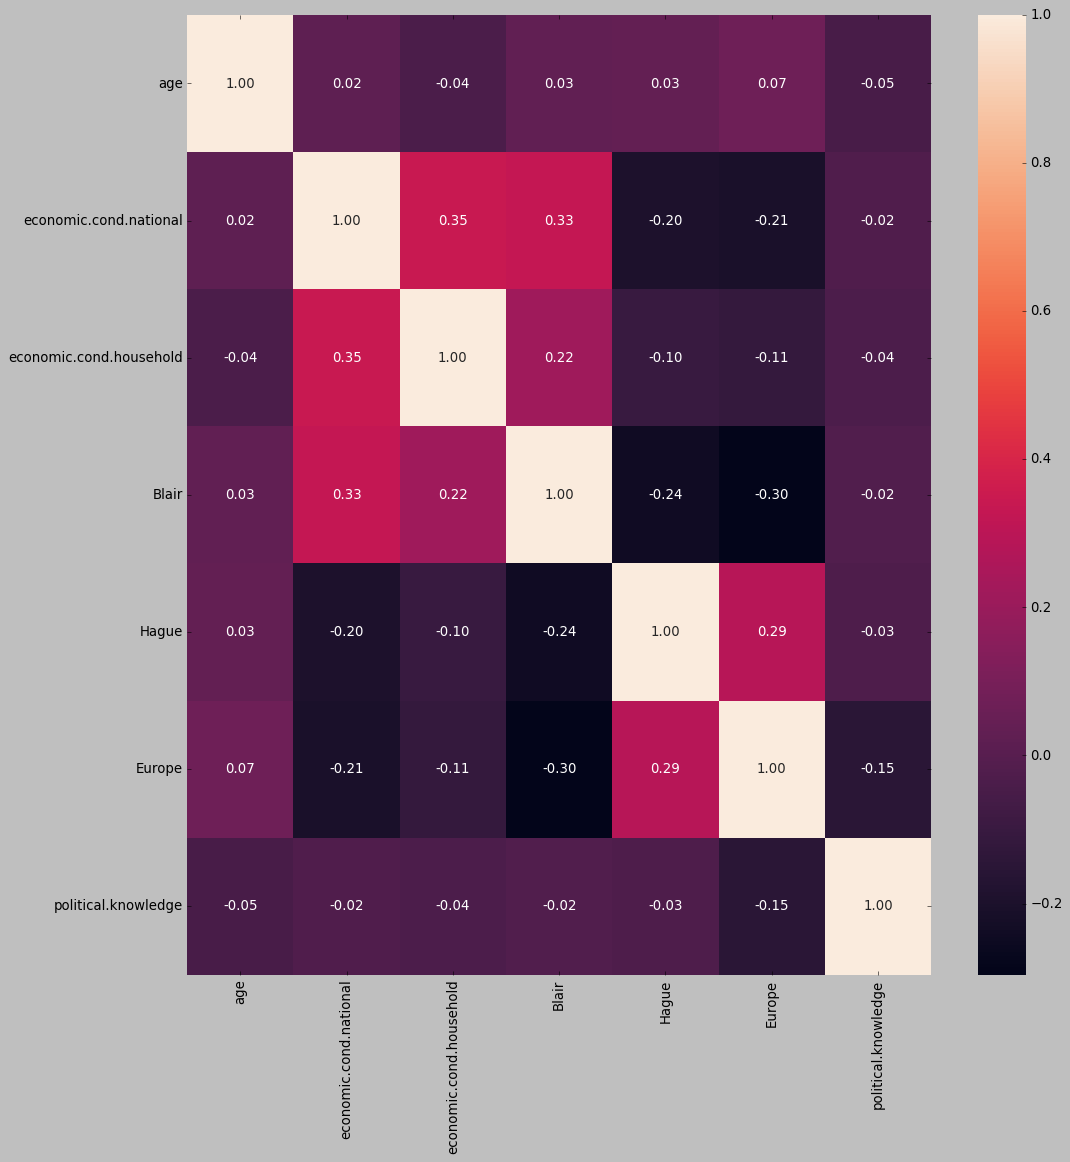

In [1247]:
plt.figure(figsize=(15,15))
sns.heatmap(data_num.corr(),annot=True,fmt=".2f");

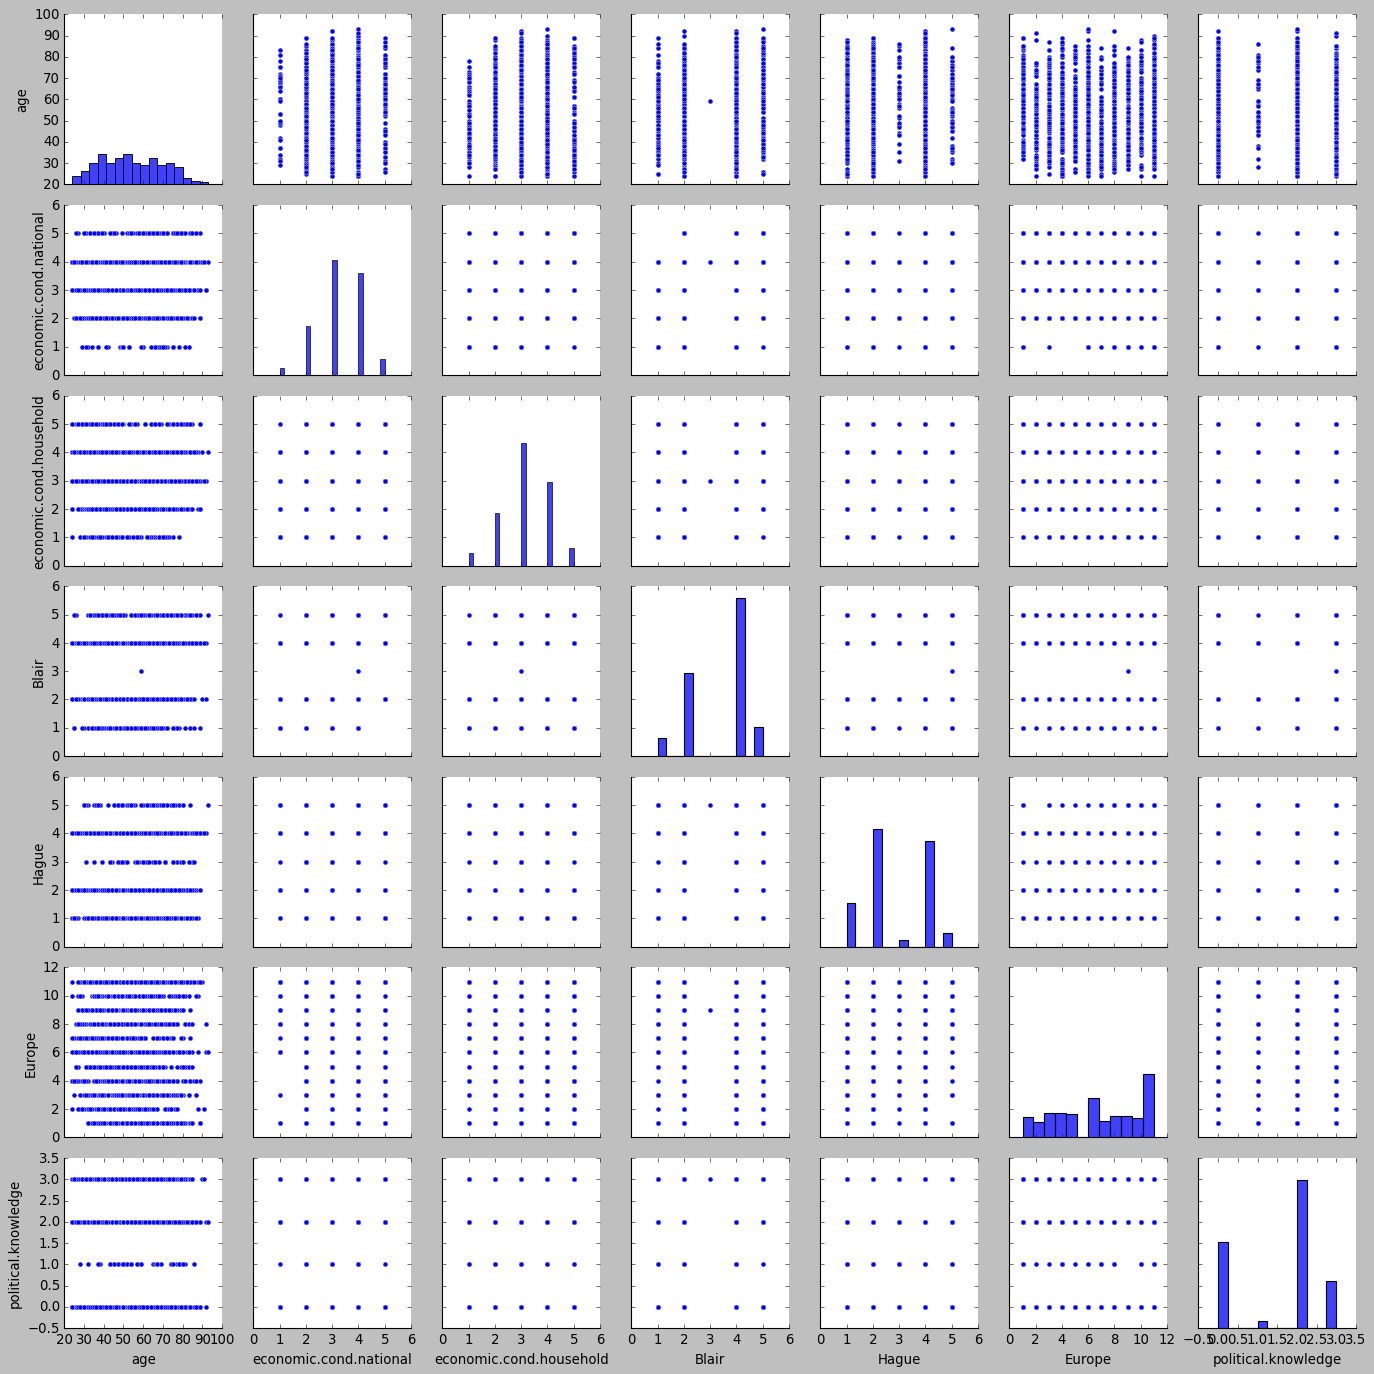

In [1248]:
sns.pairplot(data_num)
plt.show();

In [1249]:
#checking for Outliers

In [1250]:
data_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

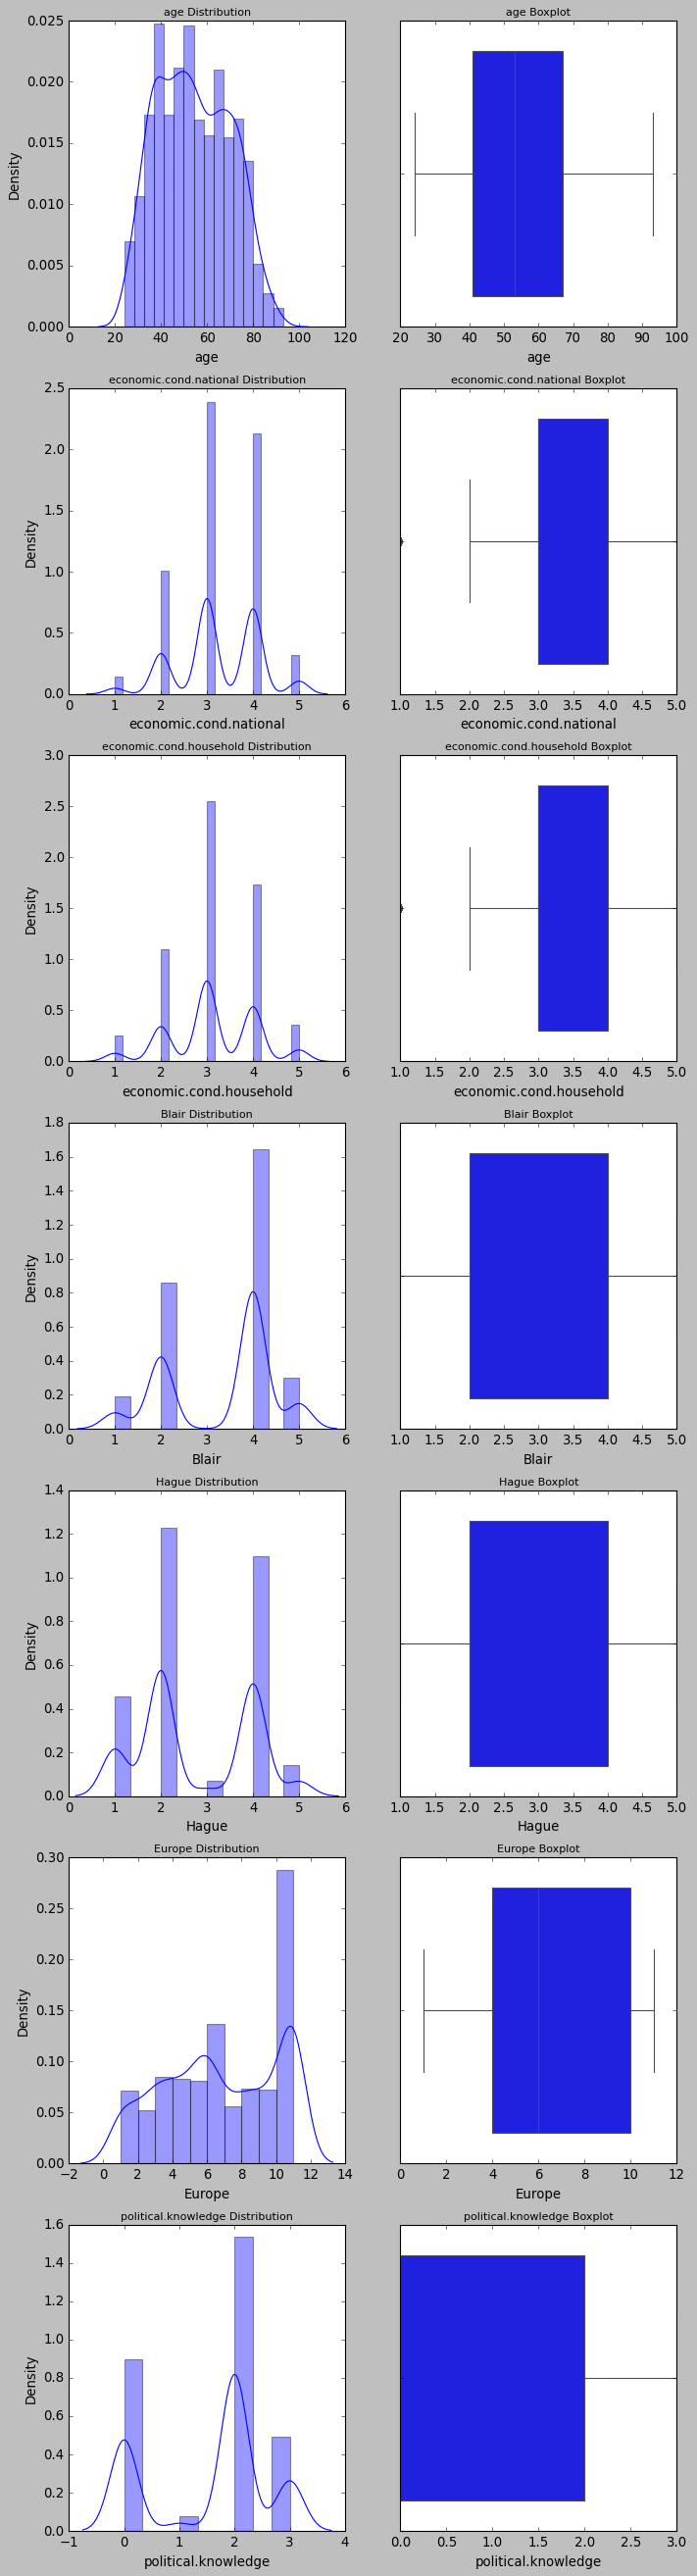

In [1251]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,40)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

In [1252]:
# treating Outliers

In [1253]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 =np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 *IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [1254]:
for column in data_num.columns[:]:
    lr,ur = remove_outlier(data_num[column])
    data_num[column] = np.where(data_num[column] > ur,ur,data_num[column])
    data_num[column] = np.where(data_num[column] < lr,lr,data_num[column])
    plt.show()
    print(column)

age
economic.cond.national
economic.cond.household
Blair
Hague
Europe
political.knowledge


age
Skew: 0.14


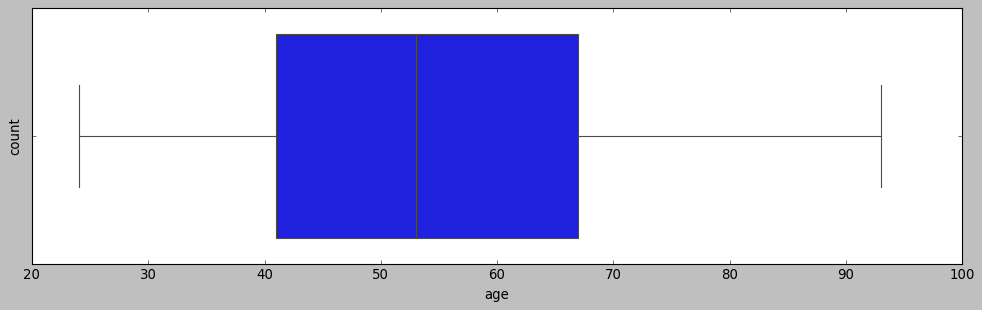

economic.cond.national
Skew: -0.07


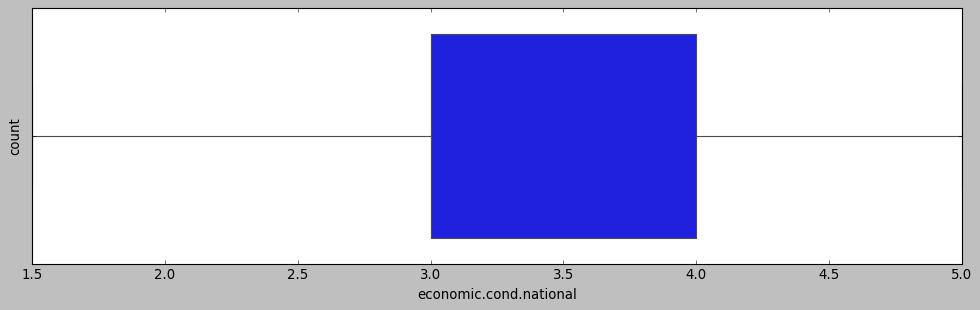

economic.cond.household
Skew: 0.09


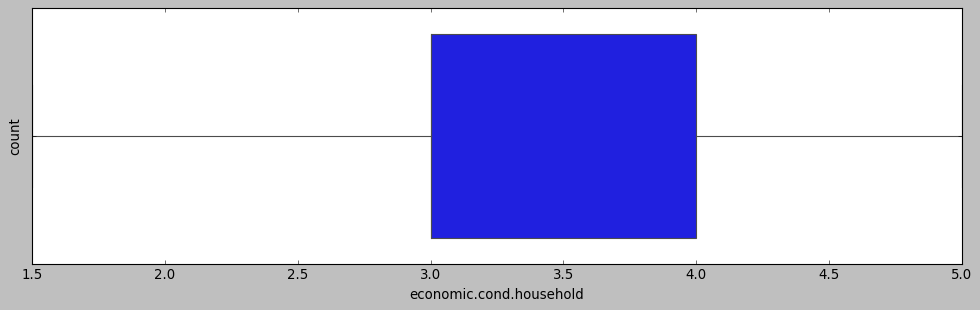

Blair
Skew: -0.54


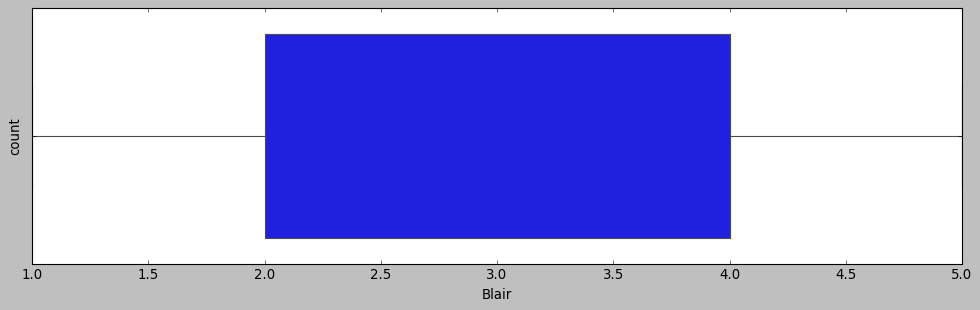

Hague
Skew: 0.15


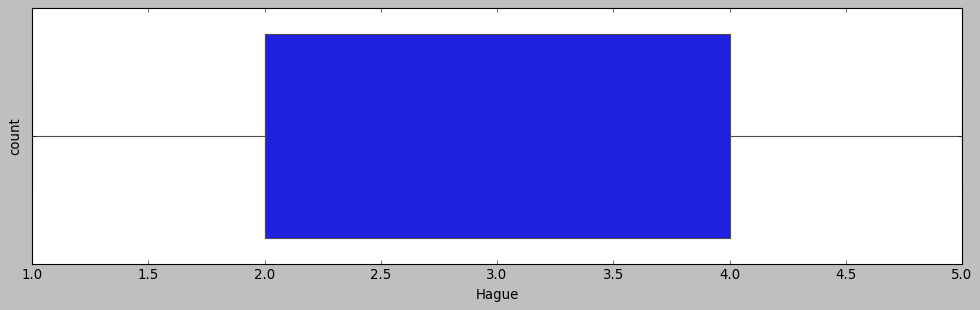

Europe
Skew: -0.14


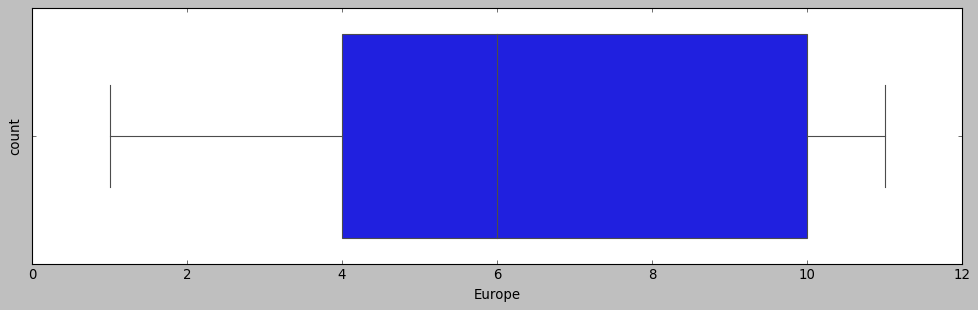

political.knowledge
Skew: -0.43


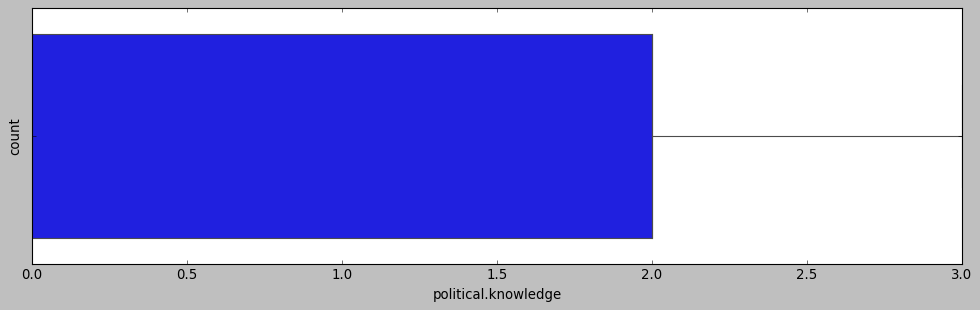

In [1255]:
#checking if outliers are treated 
for col in data_num.columns[:]:
    print(col)
    print('Skew:',round(data_num[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.ylabel('count')
    sns.boxplot(x=data_num[col])
    plt.show()

In [1256]:
df = pd.concat([data_num,data_cat], axis = 1, join ='inner')
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,Labour,female
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,Labour,male
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,Labour,male
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,Labour,female
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,Labour,male


# 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [1257]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,Labour,female
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,Labour,male
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,Labour,male
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,Labour,female
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,Labour,male


In [1258]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [1259]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [1260]:
df = pd.get_dummies(df, columns = ['vote'],drop_first = True)

In [1261]:
df = pd.get_dummies(df, columns = ['gender'],drop_first = True)

In [1262]:
df.tail(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1515,82.0,2.0,2.0,2.0,1.0,11.0,2.0,0,0
1516,30.0,3.0,4.0,4.0,2.0,4.0,2.0,1,1
1517,76.0,4.0,3.0,2.0,2.0,11.0,2.0,1,1
1518,50.0,3.0,4.0,4.0,2.0,5.0,2.0,1,1
1519,35.0,3.0,4.0,4.0,2.0,8.0,2.0,0,1
1520,67.0,5.0,3.0,2.0,4.0,11.0,3.0,0,1
1521,73.0,2.0,2.0,4.0,4.0,8.0,2.0,0,1
1522,37.0,3.0,3.0,5.0,4.0,2.0,2.0,1,1
1523,61.0,3.0,3.0,1.0,4.0,11.0,2.0,0,1
1524,74.0,2.0,3.0,2.0,4.0,11.0,0.0,0,0


In [1263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic.cond.national   1525 non-null   float64
 2   economic.cond.household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political.knowledge      1525 non-null   float64
 7   vote_Labour              1525 non-null   uint8  
 8   gender_male              1525 non-null   uint8  
dtypes: float64(7), uint8(2)
memory usage: 86.5 KB


In [1264]:
df['vote_Labour'].value_counts()

1    1063
0     462
Name: vote_Labour, dtype: int64

# 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Logistic Regression

In [1265]:
# Copy all the predictor variables into X dataframe
X = df.drop(['vote_Labour'], axis=1)

# Copy target into the y dataframe. 
Y = df['vote_Labour']

In [1266]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
type(X_train)

pandas.core.frame.DataFrame

In [1267]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
#predicting train and test data
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

Getting the Predicted Classes and Probs

In [1268]:
ytest_predict_prob=model.predict_proba(X_test)
ytrain_predict_prob=model.predict_proba(X_train)

print(pd.DataFrame(ytest_predict_prob).head())
print(pd.DataFrame(ytrain_predict_prob).head())

          0         1
0  0.918608  0.081392
1  0.691529  0.308471
2  0.343582  0.656418
3  0.483586  0.516414
4  0.163344  0.836656
          0         1
0  0.616813  0.383187
1  0.191007  0.808993
2  0.187941  0.812059
3  0.167819  0.832181
4  0.052430  0.947570


Accuracy for train and test

In [1269]:
## Performance Matrix on train data set
y_train_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1270]:
## Performance Matrix on test data set
y_test_predict = model.predict(X_test)
model_score_test = model.score(X_test, y_test)
print(model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Model Tuning on Logistic Regression

In [1271]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5,scoring = 'accuracy',verbose=0)

In [1272]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [1273]:
grid_search.best_params_

{'penalty': 'l2'}

In [1274]:
best_grid = grid_search.best_estimator_

In [1275]:
best_grid

LogisticRegression()

In [1276]:
## Performance Matrix on train data set
y_train_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1277]:
## Performance Matrix on test data set
y_test_predict = model.predict(X_test)
model_score_test = model.score(X_test, y_test)
print(model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1278]:
#Confusion matrix -training data
print(metrics.confusion_matrix(y_train, y_train_predict))

[[229 103]
 [ 68 667]]


AUC: 0.890


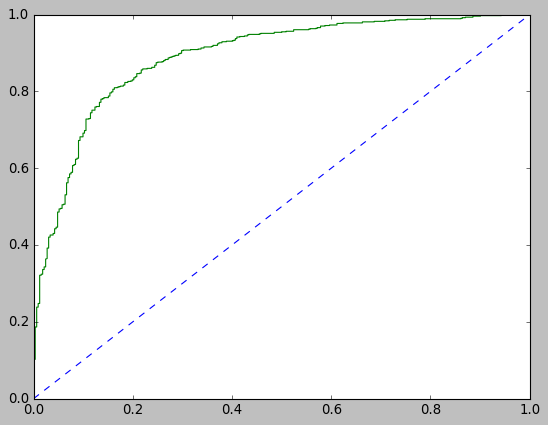

In [1279]:
#for training data
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train = y_train.replace({"No":0,"Yes":1})
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1280]:
#Confusion matrix -testing data
print(metrics.confusion_matrix(y_test, y_test_predict))

[[ 85  45]
 [ 37 291]]


AUC: 0.883


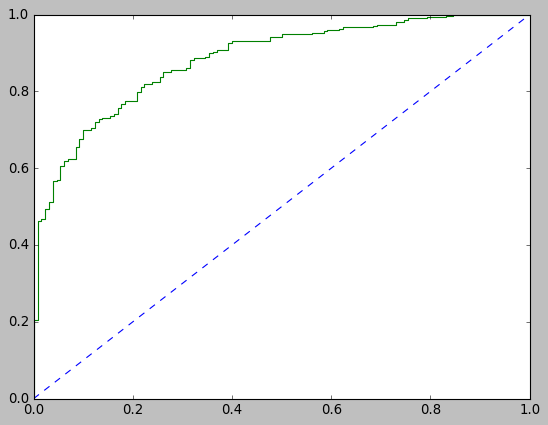

In [1281]:
#for testing data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test = y_test.replace({"No":0,"Yes":1})
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

LDA

In [1282]:
#Scaling the data which is a pre-requisite for LDA 
scaler=StandardScaler()
X_lda = scaler.fit_transform(df.drop(['vote_Labour'],axis=1))
Y_lda = df['vote_Labour']

In [1283]:
X_train_lda,X_test_lda,y_train_lda,y_test_lda = model_selection.train_test_split(X_lda,Y_lda,test_size=0.30,
                                                                                 random_state=1)

In [1284]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train_lda,y_train_lda)

print(model_lda)

LinearDiscriminantAnalysis()


Generate Coefficients and intercept for the Linear Discriminant Function¶

In [1285]:
#intercept value
clf.intercept_ 

array([1.40734046])

In [1286]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.40295233,  0.32169843,  0.14163935,  0.82383235, -1.18995661,
        -0.85300762, -0.61738079,  0.12459723]])

In [1287]:
# Training Data Probability Prediction
pred_prob_train_lda = model_lda.predict_proba(X_train_lda)

# Test Data Probability Prediction
pred_prob_test_lda = model_lda.predict_proba(X_test_lda)

print(pd.DataFrame(pred_prob_test_lda).head())
print(pd.DataFrame(pred_prob_train_lda).head())

          0         1
0  0.943417  0.056583
1  0.743056  0.256944
2  0.340433  0.659567
3  0.496549  0.503451
4  0.140949  0.859051
          0         1
0  0.648650  0.351350
1  0.162890  0.837110
2  0.180964  0.819036
3  0.137686  0.862314
4  0.038738  0.961262


Accuracy for train and test

In [1288]:
## Performance Matrix on train data set
y_train_predict_lda = model_lda.predict(X_train_lda)
model_score_lda = model_lda.score(X_train_lda, y_train_lda)
print(model_score_lda)
print(metrics.confusion_matrix(y_train_lda, y_train_predict_lda))
print(metrics.classification_report(y_train_lda, y_train_predict_lda))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1289]:
## Performance Matrix on test data set
y_test_predict_lda = model_lda.predict(X_test_lda)
model_score_ldat = model_lda.score(X_test_lda, y_test_lda)
print(model_score_ldat)
print(metrics.confusion_matrix(y_test_lda, y_test_predict_lda))
print(metrics.classification_report(y_test_lda, y_test_predict_lda))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Model Tuning for LDA

In [1290]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.5],
    'n_components': [None, 2, 5, 10]
}

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5,scoring = 'accuracy')

In [1291]:
grid_search.fit(X_train_lda, y_train_lda)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [None, 2, 5, 10],
                         'shrinkage': [None, 'auto', 0.5],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [1292]:
grid_search.best_params_

{'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr'}

In [1293]:
best_grid = grid_search.best_estimator_

In [1294]:
best_grid

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [1295]:
## Performance Matrix on train data set
y_train_predict_lda = model_lda.predict(X_train_lda)
model_score_lda = model_lda.score(X_train_lda, y_train_lda)
print(model_score_lda)
print(metrics.confusion_matrix(y_train_lda, y_train_predict_lda))
print(metrics.classification_report(y_train_lda, y_train_predict_lda))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1296]:
## Performance Matrix on test data set
y_test_predict_lda = model_lda.predict(X_test_lda)
model_score_ldat = model_lda.score(X_test_lda, y_test_lda)
print(model_score_ldat)
print(metrics.confusion_matrix(y_test_lda, y_test_predict_lda))
print(metrics.classification_report(y_test_lda, y_test_predict_lda))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [1297]:
#for training data
confusion_matrix(y_train_lda, y_train_predict_lda)

array([[236,  96],
       [ 75, 660]], dtype=int64)

AUC: 0.889


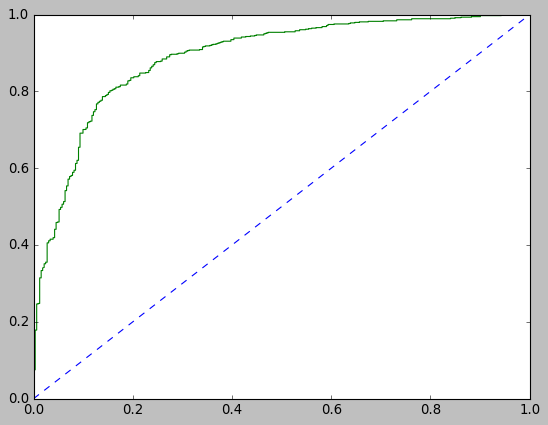

In [1298]:
#for training data
# predict probabilities
probs = model_lda.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_lda, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_lda = y_train_lda.replace({"No":0,"Yes":1})
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train_lda, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda);

In [1299]:
#for testing data
confusion_matrix(y_test_lda, y_test_predict_lda)

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

AUC: 0.884


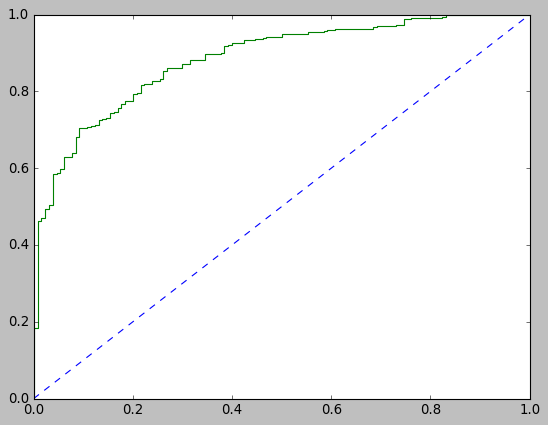

In [1300]:
#for testing data
# predict probabilities
probs = model_lda.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_lda, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_lda = y_test_lda.replace({"No":0,"Yes":1})
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test_lda, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda, test_tpr_lda);

# 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Gaussian Naive Bayes

In [1301]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [1302]:
X_guas = scaler.fit_transform(df.drop(['vote_Labour'],axis=1))
Y_guas = df['vote_Labour']

In [1303]:
X_train_guas, X_test_guas, y_train_guas, y_test_guas = train_test_split(X_guas, Y_guas, test_size=0.30 , random_state=1)

In [1304]:
NB_model = GaussianNB()
model_guas = NB_model.fit(X_train_guas, y_train_guas)
print(model_guas)

GaussianNB()


In [1305]:
# Training Data Probability Prediction
pred_prob_train_guas = model_guas.predict_proba(X_train_guas)

# Test Data Probability Prediction
pred_prob_test_guas = model_guas.predict_proba(X_test_guas)

print(pd.DataFrame(pred_prob_test_guas).head())
print(pd.DataFrame(pred_prob_train_guas).head())

          0         1
0  0.985393  0.014607
1  0.879810  0.120190
2  0.452403  0.547597
3  0.550728  0.449272
4  0.254818  0.745182
          0         1
0  0.730285  0.269715
1  0.282791  0.717209
2  0.102563  0.897437
3  0.171117  0.828883
4  0.022907  0.977093


Accuracy of our Gaussian Naive Bayes model

In [1306]:
## Performance Matrix on train data set
y_train_predict_guas = model_guas.predict(X_train_guas)
model_score_guas = model_guas.score(X_train_guas, y_train_guas)
print(model_score_guas)
print(metrics.confusion_matrix(y_train_guas, y_train_predict_guas))
print(metrics.classification_report(y_train_guas, y_train_predict_guas))

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [1307]:
## Performance Matrix on test data set
y_test_predict_guas = model_guas.predict(X_test_guas)
model_score_guast = model_guas.score(X_test_guas, y_test_guas)
print(model_score_guast)
print(metrics.confusion_matrix(y_test_guas, y_test_predict_guas))
print(metrics.classification_report(y_test_guas, y_test_predict_guas))

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [1308]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7] 
}

gnb = GaussianNB()

grid_search = GridSearchCV(estimator = gnb, param_grid = param_grid, cv = 5)

In [1309]:
grid_search.fit(X_train_guas, y_train_guas)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [1310]:
grid_search.best_params_

{'var_smoothing': 1e-09}

In [1311]:
best_grid = grid_search.best_estimator_

In [1312]:
best_grid

GaussianNB()

In [1313]:
## Performance Matrix on train data set
y_train_predict_guas = model_guas.predict(X_train_guas)
model_score_guas = model_guas.score(X_train_guas, y_train_guas)
print(model_score_guas)
print(metrics.confusion_matrix(y_train_guas, y_train_predict_guas))
print(metrics.classification_report(y_train_guas, y_train_predict_guas))

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [1314]:
## Performance Matrix on test data set
y_test_predict_guas = model_guas.predict(X_test_guas)
model_score_guast = model_guas.score(X_test_guas, y_test_guas)
print(model_score_guast)
print(metrics.confusion_matrix(y_test_guas, y_test_predict_guas))
print(metrics.classification_report(y_test_guas, y_test_predict_guas))

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [1315]:
#for training data
confusion_matrix(y_train_guas, y_train_predict_guas)

array([[240,  92],
       [ 87, 648]], dtype=int64)

AUC: 0.887


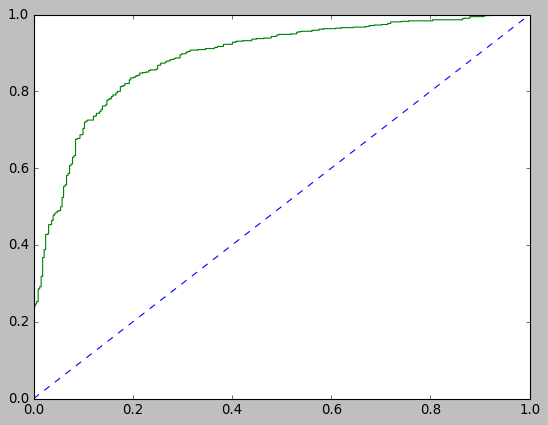

In [1316]:
#for training data
# predict probabilities
probs = model_guas.predict_proba(X_train_guas)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_guas, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_guas = y_train_guas.replace({"No":0,"Yes":1})
train_fpr_guas, train_tpr_guas, train_thresholds_guas = roc_curve(y_train_guas, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_guas, train_tpr_guas);

In [1317]:
#for test data
confusion_matrix(y_test_guas, y_test_predict_guas)

array([[ 94,  36],
       [ 45, 283]], dtype=int64)

AUC: 0.885


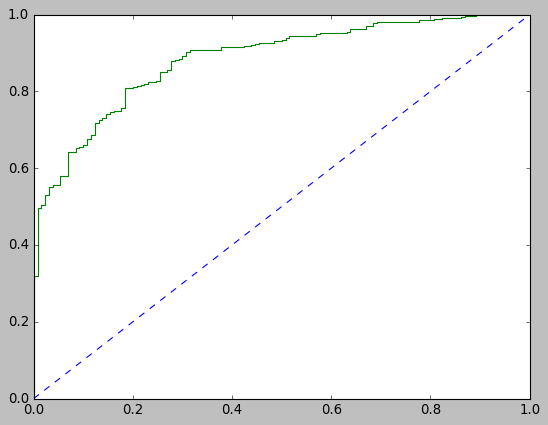

In [1318]:
#for test data
# predict probabilities
probs = model_guas.predict_proba(X_test_guas)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_guas, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_guas = y_test_guas.replace({"No":0,"Yes":1})
test_fpr_guas, test_tpr_guas, test_thresholds_guas = roc_curve(y_test_guas, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_guas, test_tpr_guas);

KNN Model

In [1319]:
from scipy.stats import zscore

In [1320]:
# Arrange data into independent variables and dependent variables
X_KNN =  df.drop(['vote_Labour'],axis=1) ## Features
y_KNN = df['vote_Labour']  ## Target

In [1321]:
X_KNN.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [1322]:
X_KNN[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender_male"]]=X_KNN[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender_male"]].apply(zscore)

In [1323]:
X_KNN.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [1324]:
# Split X and y into training and test set in 70:30 ratio
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN, y_KNN, test_size=0.30 , random_state=10)

In [1325]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier()

In [1326]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN_train = KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN_train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8669165885660731
[[245  86]
 [ 56 680]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       331
           1       0.89      0.92      0.91       736

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.87      1067



In [1327]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score_KNN_test = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score_KNN_test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.7947598253275109
[[ 79  52]
 [ 42 285]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       131
           1       0.85      0.87      0.86       327

    accuracy                           0.79       458
   macro avg       0.75      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [1328]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_7=KNeighborsClassifier(n_neighbors=7)
KNN_model_7.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(n_neighbors=7)

In [1329]:
## Performance Matrix on train data set
y_train_predict_KNN7 = KNN_model_7.predict(X_train_KNN)
model_score_KNN_train7 = KNN_model_7.score(X_train_KNN, y_train_KNN)
print(model_score_KNN_train7)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN7))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN7))

0.85941893158388
[[237  94]
 [ 56 680]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       331
           1       0.88      0.92      0.90       736

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [1330]:
## Performance Matrix on test data set
y_test_predict_KNN7 = KNN_model_7.predict(X_test_KNN)
model_score_KNN_test7 = KNN_model_7.score(X_test_KNN, y_test_KNN)
print(model_score_KNN_test7)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN7))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN7))

0.8078602620087336
[[ 82  49]
 [ 39 288]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       131
           1       0.85      0.88      0.87       327

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.81       458



# Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

In [1331]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22707423580786024,
 0.20305676855895194,
 0.20524017467248912,
 0.19213973799126638,
 0.19432314410480345,
 0.1899563318777293,
 0.18122270742358082,
 0.1746724890829694,
 0.18122270742358082,
 0.17030567685589515]

Plot misclassification error vs k (with k value on X-axis) using matplotlib

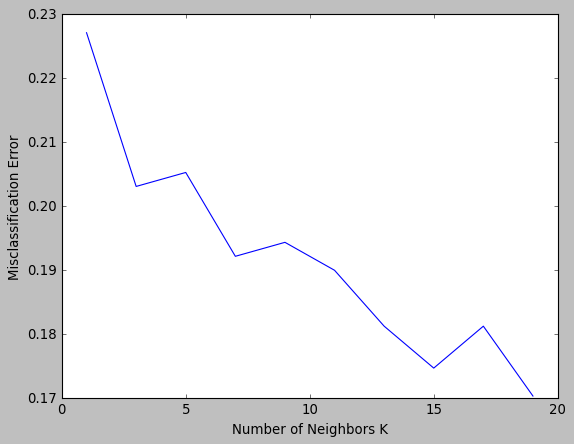

In [1332]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [1333]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_18=KNeighborsClassifier(n_neighbors=18)
KNN_model_18.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(n_neighbors=18)

In [1334]:
## Performance Matrix on train data set
y_train_predict_KNN18 = KNN_model_18.predict(X_train_KNN)
model_score_KNN_train18 = KNN_model_18.score(X_train_KNN, y_train_KNN)
print(model_score_KNN_train18)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN18))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN18))

0.837863167760075
[[239  92]
 [ 81 655]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       331
           1       0.88      0.89      0.88       736

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1335]:
## Performance Matrix on test data set
y_test_predict_KNN18 = KNN_model_18.predict(X_test_KNN)
model_score_KNN_test18 = KNN_model_18.score(X_test_KNN, y_test_KNN)
print(model_score_KNN_test18)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN18))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN18))

0.8231441048034934
[[ 88  43]
 [ 38 289]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       131
           1       0.87      0.88      0.88       327

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Model Tuning for KNN

In [1336]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2]  # Power parameter for Minkowski distance
}
# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [1337]:
grid_search.fit(X_train_KNN, y_train_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [1338]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [1339]:
best_grid = grid_search.best_estimator_

In [1340]:
best_grid

KNeighborsClassifier(n_neighbors=7, p=1)

In [1341]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN_train = KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN_train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8669165885660731
[[245  86]
 [ 56 680]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       331
           1       0.89      0.92      0.91       736

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.87      1067



In [1342]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score_KNN_test = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score_KNN_test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.7947598253275109
[[ 79  52]
 [ 42 285]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       131
           1       0.85      0.87      0.86       327

    accuracy                           0.79       458
   macro avg       0.75      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [1343]:
#for training data
confusion_matrix(y_train_KNN, y_train_predict_KNN)

array([[245,  86],
       [ 56, 680]], dtype=int64)

AUC: 0.933


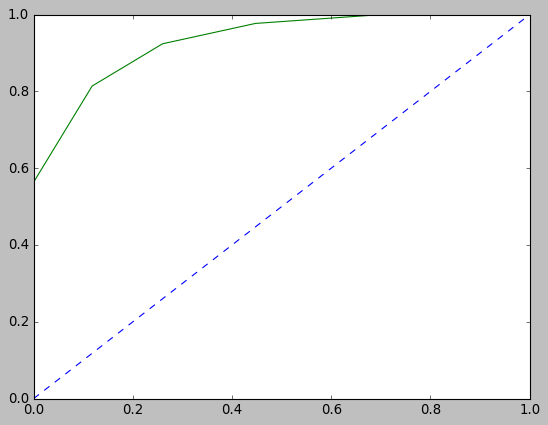

In [1344]:
#for training data
# predict probabilities
probs = KNN_model.predict_proba(X_train_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_KNN, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_KNN = y_train_KNN.replace({"No":0,"Yes":1})
train_fpr_KNN, train_tpr_KNN, train_thresholds_KNN = roc_curve(y_train_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_KNN, train_tpr_KNN);

In [1345]:
#for test data
confusion_matrix(y_test_KNN, y_test_predict_KNN)

array([[ 79,  52],
       [ 42, 285]], dtype=int64)

AUC: 0.846


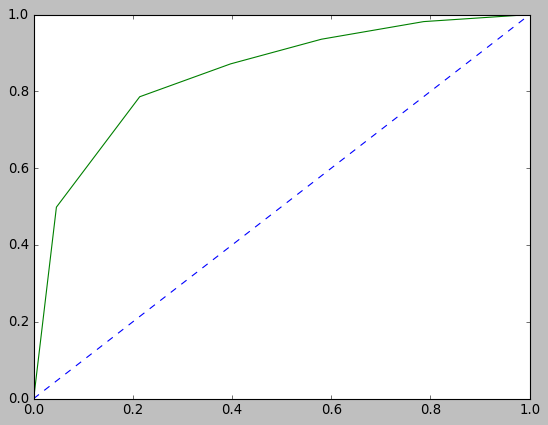

In [1346]:
#for test data
# predict probabilities
probs = KNN_model.predict_proba(X_test_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_KNN, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_KNN = y_test_KNN.replace({"No":0,"Yes":1})
test_fpr_KNN, test_tpr_KNN, test_thresholds_KNN = roc_curve(y_test_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_KNN, test_tpr_KNN);

# 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [1347]:
# Arrange data into independent variables and dependent variables
X_RF =  df.drop(['vote_Labour'],axis=1) ## Features
y_RF = df['vote_Labour']  ## Target

In [1348]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.30 , random_state=1)

RANDOM FOREST

In [1349]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train_RF, y_train_RF)

RandomForestClassifier(n_estimators=200, random_state=0)

In [1350]:
## Performance Matrix on training data set
y_train_predictRF = RF_model.predict(X_train_RF)
model_score_RF = RF_model.score(X_train_RF, y_train_RF)
print(model_score_RF)
print(metrics.confusion_matrix(y_train_RF, y_train_predictRF))
print(metrics.classification_report(y_train_RF, y_train_predictRF))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [1351]:
## Performance Matrix on test data set
y_test_predictRF = RF_model.predict(X_test_RF)
model_score_RFt = RF_model.score(X_test_RF, y_test_RF)
print(model_score_RFt)
print(metrics.confusion_matrix(y_test_RF, y_test_predictRF))
print(metrics.classification_report(y_test_RF, y_test_predictRF))

0.8209606986899564
[[ 89  41]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Model tuning on Decision Tree Model

In [1352]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [1353]:
grid_search.fit(X_train_RF, y_train_RF)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [8],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100]})

In [1354]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [1355]:
best_grid = grid_search.best_estimator_

In [1356]:
best_grid

RandomForestClassifier(max_depth=7, max_features=8, min_samples_leaf=5,
                       min_samples_split=50)

In [1357]:
## Performance Matrix on training data set
y_train_predictRF = RF_model.predict(X_train_RF)
model_score_RF = RF_model.score(X_train_RF, y_train_RF)
print(model_score_RF)
print(metrics.confusion_matrix(y_train_RF, y_train_predictRF))
print(metrics.classification_report(y_train_RF, y_train_predictRF))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [1358]:
## Performance Matrix on test data set
y_test_predictRF = RF_model.predict(X_test_RF)
model_score_RFt = RF_model.score(X_test_RF, y_test_RF)
print(model_score_RFt)
print(metrics.confusion_matrix(y_test_RF, y_test_predictRF))
print(metrics.classification_report(y_test_RF, y_test_predictRF))

0.8209606986899564
[[ 89  41]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1359]:
#for training data
confusion_matrix(y_train_RF, y_train_predictRF)

array([[331,   1],
       [  0, 735]], dtype=int64)

AUC: 1.000


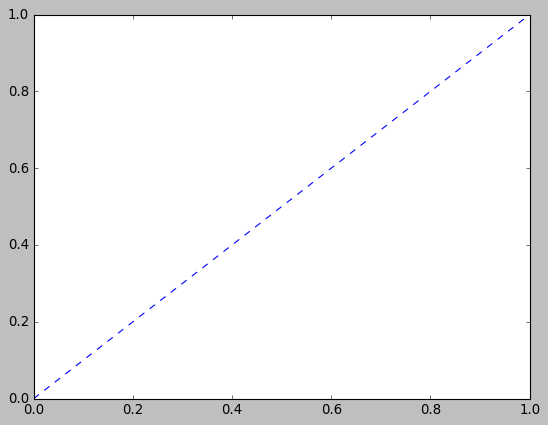

In [1360]:
#for training data
# predict probabilities
probs = RF_model.predict_proba(X_train_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_RF = y_train_RF.replace({"No":0,"Yes":1})
train_fpr_RF, train_tpr_RF, train_thresholds_RF = roc_curve(y_train_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_RF, train_tpr_RF);

In [1361]:
#for test data
confusion_matrix(y_test_RF, y_test_predictRF)

array([[ 89,  41],
       [ 41, 287]], dtype=int64)

AUC: 0.891


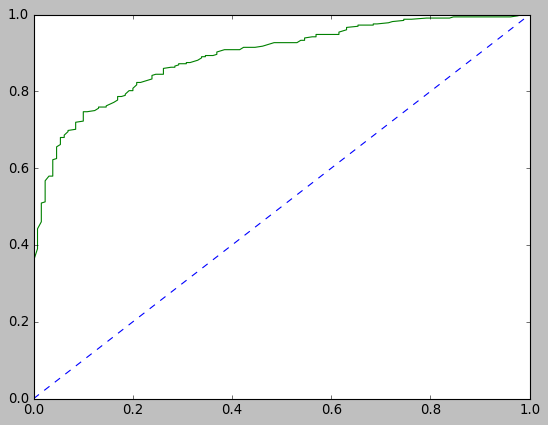

In [1362]:
#for test data
# predict probabilities
probs = RF_model.predict_proba(X_test_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_RF = y_test_RF.replace({"No":0,"Yes":1})
test_fpr_RF, test_tpr_RF, test_thresholds_RF = roc_curve(y_test_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_RF, test_tpr_RF);

Ensemble Learning - Bagging

In [1363]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier( n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_RF, y_train_RF)


0.9962511715089035
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       0.99      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

[[331   1]
 [  3 732]]


<AxesSubplot:>

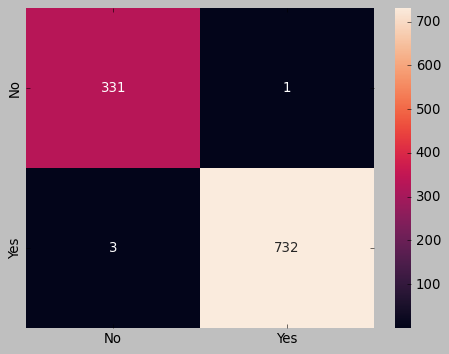

In [1364]:
y_predict_BG = bgcl.predict(X_train_RF)

print(bgcl.score(X_train_RF , y_train_RF))
print(metrics.classification_report(y_train_RF, y_predict_BG))
cm=metrics.confusion_matrix(y_train_RF, y_predict_BG,labels=[0, 1])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



0.8034934497816594
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       130
           1       0.86      0.87      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458

[[ 84  46]
 [ 44 284]]


<AxesSubplot:>

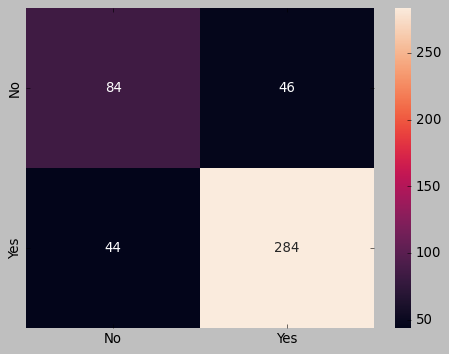

In [1365]:
y_predict_BGt = bgcl.predict(X_test_RF)

print(bgcl.score(X_test_RF , y_test_RF))
print(metrics.classification_report(y_test_RF, y_predict_BGt))
cm=metrics.confusion_matrix(y_test_RF, y_predict_BGt,labels=[0, 1])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



AUC: 1.000


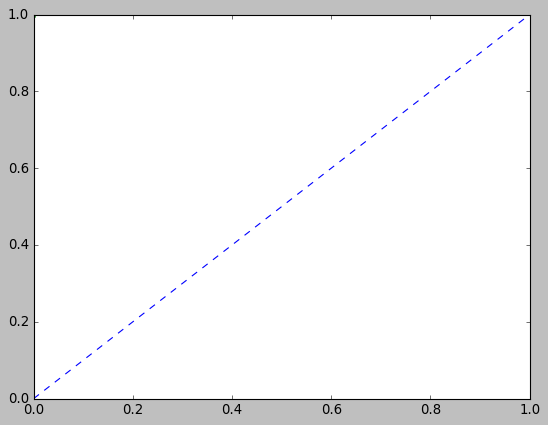

In [1366]:
#for training data
# predict probabilities
probs = bgcl.predict_proba(X_train_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_RF = y_train_RF.replace({"No":0,"Yes":1})
train_fpr_RF, train_tpr_RF, train_thresholds_RF = roc_curve(y_train_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_RF, train_tpr_RF);

AUC: 0.876


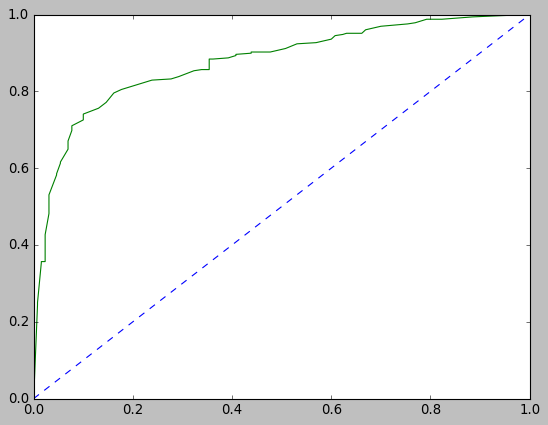

In [1367]:
#for test data
# predict probabilities
probs = bgcl.predict_proba(X_test_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_RF = y_test_RF.replace({"No":0,"Yes":1})
test_fpr_RF, test_tpr_RF, test_thresholds_RF = roc_curve(y_test_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_RF, test_tpr_RF);

Ensemble Learning - AdaBoosting

In [1368]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train_RF, y_train_RF)

0.8397375820056232
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

[[234  98]
 [ 73 662]]


<AxesSubplot:>

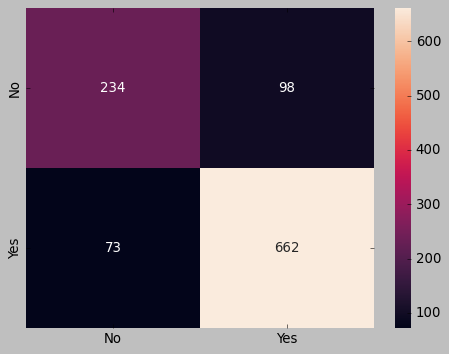

In [1369]:
y_predict_AD = abcl.predict(X_train_RF)

print(abcl.score(X_train_RF , y_train_RF))
print(metrics.classification_report(y_train_RF, y_predict_AD))
cm=metrics.confusion_matrix(y_train_RF, y_predict_AD,labels=[0, 1])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



0.8231441048034934
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

[[ 90  40]
 [ 41 287]]


<AxesSubplot:>

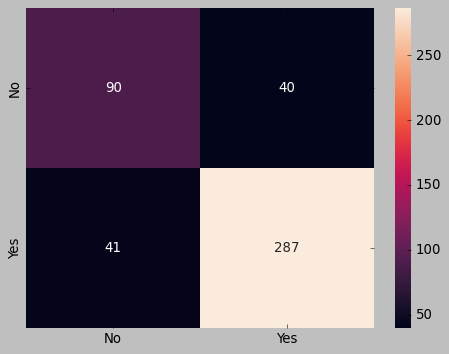

In [1370]:
y_predict_ADt = abcl.predict(X_test_RF)

print(abcl.score(X_test_RF , y_test_RF))
print(metrics.classification_report(y_test_RF, y_predict_ADt))
cm=metrics.confusion_matrix(y_test_RF, y_predict_ADt,labels=[0, 1])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



AUC: 0.896


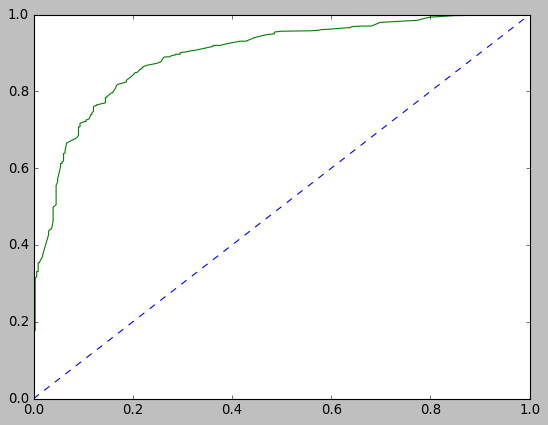

In [1371]:
#for training data
# predict probabilities
probs = abcl.predict_proba(X_train_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_RF = y_train_RF.replace({"No":0,"Yes":1})
train_fpr_RF, train_tpr_RF, train_thresholds_RF = roc_curve(y_train_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_RF, train_tpr_RF);

AUC: 0.887


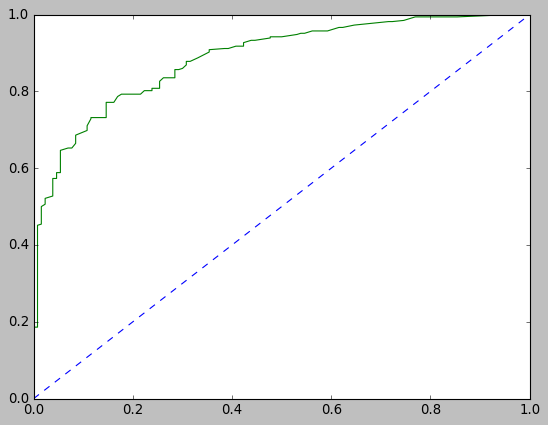

In [1372]:
#for test data
# predict probabilities
probs = abcl.predict_proba(X_test_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_RF = y_test_RF.replace({"No":0,"Yes":1})
test_fpr_RF, test_tpr_RF, test_thresholds_RF = roc_curve(y_test_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_RF, test_tpr_RF);

Ensemble Learning - GradientBoost

In [1373]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_RF, y_train_RF)

0.8734770384254921
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       332
           1       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067

[[250  82]
 [ 53 682]]


<AxesSubplot:>

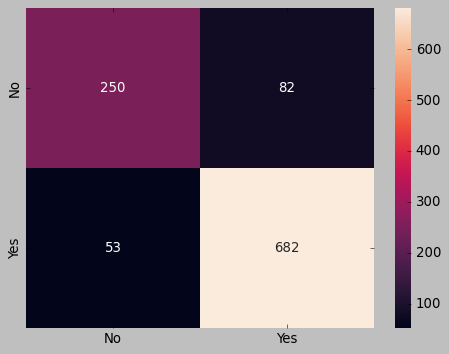

In [1374]:
y_predict_DB = gbcl.predict(X_train_RF)
print(gbcl.score(X_train_RF, y_train_RF))
print(metrics.classification_report(y_train_RF, y_predict_DB))
cm=metrics.confusion_matrix(y_train_RF, y_predict_DB,labels=[0, 1])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8362445414847162
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       130
           1       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458

[[ 97  33]
 [ 42 286]]


<AxesSubplot:>

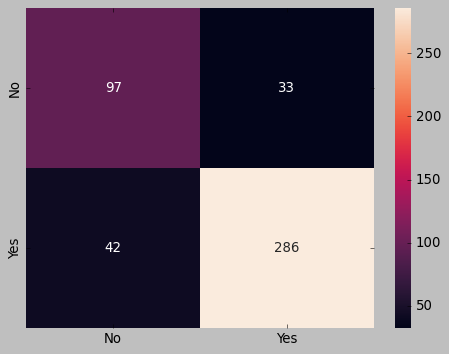

In [1375]:
y_predict_DBT = gbcl.predict(X_test_RF)
print(gbcl.score(X_test_RF, y_test_RF))
print(metrics.classification_report(y_test_RF, y_predict_DBT))
cm=metrics.confusion_matrix(y_test_RF, y_predict_DBT,labels=[0, 1])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.936


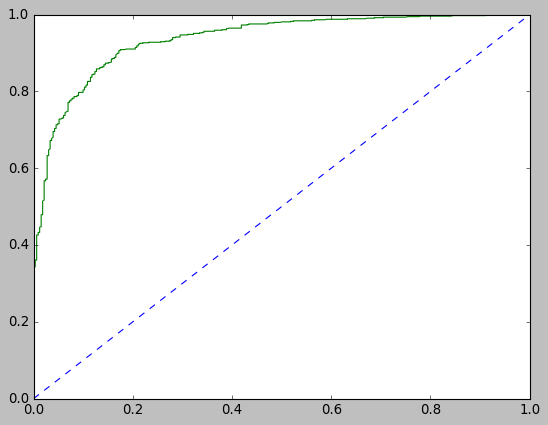

In [1376]:
#for training data
# predict probabilities
probs = gbcl.predict_proba(X_train_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_RF = y_train_RF.replace({"No":0,"Yes":1})
train_fpr_RF, train_tpr_RF, train_thresholds_RF = roc_curve(y_train_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_RF, train_tpr_RF);

AUC: 0.907


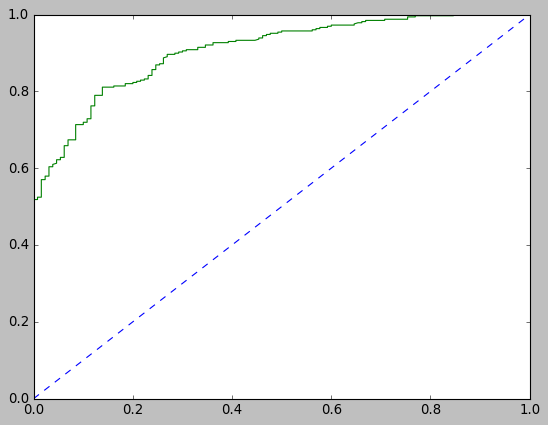

In [1377]:
#for test data
# predict probabilities
probs = gbcl.predict_proba(X_test_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_RF, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_RF = y_test_RF.replace({"No":0,"Yes":1})
test_fpr_RF, test_tpr_RF, test_thresholds_RF = roc_curve(y_test_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_RF, test_tpr_RF);